#### Plot salary year avg distribution for data analyst in united states

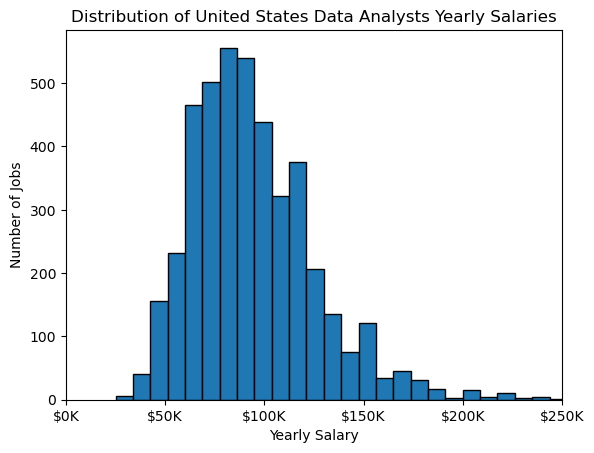

In [7]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

# filter for data analyst in us
df_da_us =  df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

# plot histogram
df_da_us['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')


ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))

plt.xlim(0,250000)

plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of United States Data Analysts Yearly Salaries')
plt.show()

##  Practice 1.  Data Scientist Hourly Salaries

Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.

Customize the plot by setting the number of bins to 40 and the bar color to blue.
Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.


Text(0.5, 1.0, 'Distribution of Hourly Salaries by Data Scientist')

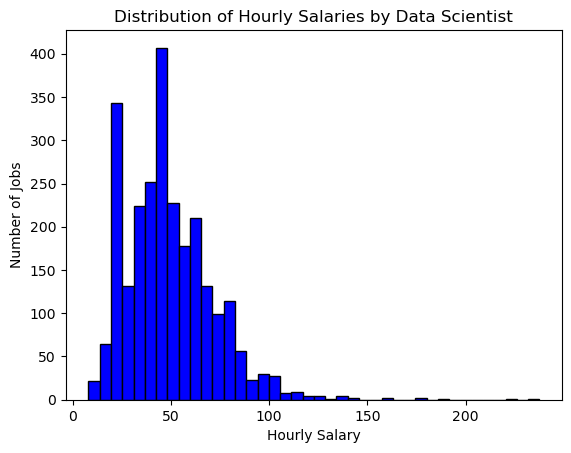

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

# filter for data analyst in us
df_ds =  df[df['job_title_short']=='Data Scientist'].copy()

df_ds['salary_hour_avg'].plot(kind='hist',bins=40,color='blue',edgecolor='black')

plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Hourly Salaries by Data Scientist')
plt.show()

## Practice 2.Job Postings by Number of Skills

Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:

Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.

Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
Add a title 'Distribution of Job Postings by Number of Skills Listed'.
Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

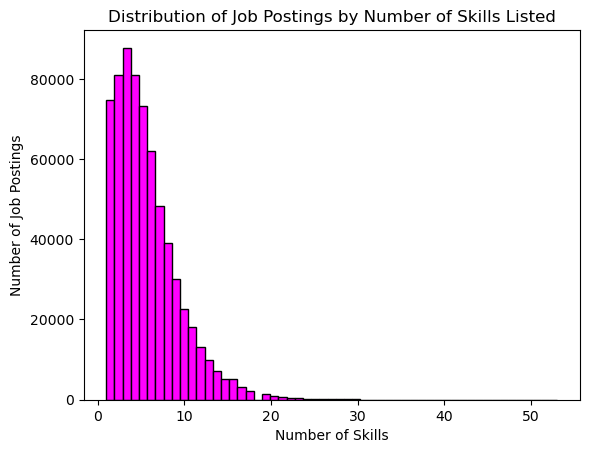

In [26]:
# import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
# Convert string representation to actual list, checking for NaN values first
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter out job postings with not-null job_skills
df = df[pd.notna(df['job_skills'])].copy()

# Explode the job_skills column
df_skills = df.explode('job_skills')
df_final= df_skills.groupby(df_skills.index)['job_skills'].size()


# for dataframe, the parameter is names not name
# df_skills = df.explode('job_skills').reset_index(names=['id'])

# By this way, no need to explode
# df_skills['num_skills'] = df_skills['job_skills'].apply(len)


df_final.plot(kind='hist',bins=55,color='magenta',edgecolor='black')

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.show()

### To get the length of lists in a column (number of items), use .apply(len)

df_skills['num_skills'] = df_skills['job_skills'].apply(len)

### To get the length of strings in a column (number of items), use .str.len()

df['some_column'].str.len()

| You have…       | Use this      | Returns              |
| --------------- | ------------- | -------------------- |
| A string column | `.str.len()`  | Number of characters |
| A list column   | `.apply(len)` | Number of list items |


### 🧠 Quick Chart Compatibility for Series:
 Chart type | Works on Series?       | Use case                          |
| ---------- | ---------------------- | --------------------------------- |
| `bar`      | ✅ Yes                  | Category counts                   |
| `line`     | ✅ Yes                  | Trends or time series             |
| `pie`      | ✅ Yes                  | Proportions from counts           |
| `hist`     | ✅ Yes                  | Distribution of numeric values    |
| `scatter`  | ❌ No (needs DataFrame) | Must use `DataFrame.plot.scatter` |


## Practice 3. Data Engineer Salaries

Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
Customize the plot by setting the number of bins to 50, the bar color to red

Add annotations for the mean and median salaries, using plt.axvline(); 
for the parameters specify:  
color: 'blue'/'green'  
linestyle: 'dashed'  
label: e.g., f'Mean: ${mean_salary:,.0f}'  
Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.  

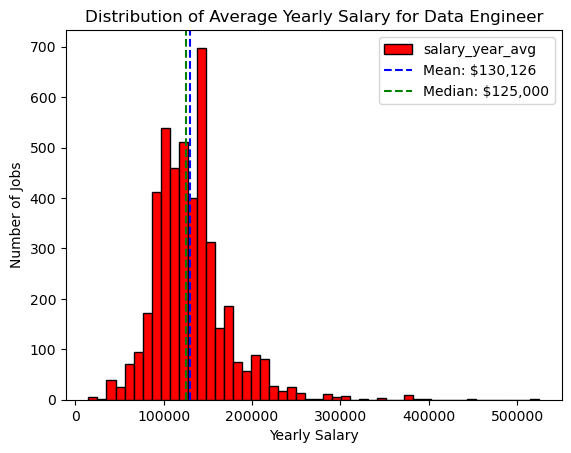

In [30]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

#import data
df=pd.read_csv('/Users/abby/Python_data_project/2_Advanced/data_jobs.csv')

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

# filter for data engineer jobs
df_de = df[df['job_title_short']=='Data Engineer'].copy()
df_de = df_de.dropna(subset='salary_year_avg')

# plot Histogram
df_de['salary_year_avg'].plot(kind='hist',edgecolor='black',color='red',bins=50)

# mean and median salaries 
mean_salary = df_de['salary_year_avg'].mean()
median_salary= df_de['salary_year_avg'].median()

plt.axvline(mean_salary,color='blue',linestyle='dashed',label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary,color='green',linestyle='dashed',label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Average Yearly Salary for Data Engineer')
plt.legend()
plt.show()

### 📌 plt.axvline() — Add a vertical line to a plot
axvline: axis verticle line  
plt.axvline(x, color='color', linestyle='style', linewidth=width, label='label')  
very useful for highlighting vertical reference lines on a plot 

| Parameter   | Meaning                                |
| ----------- | -------------------------------------- |
| `x`         | x-coordinate where the line appears    |
| `color`     | Line color (e.g., `'red'`, `'black'`)  |
| `linestyle` | `'--'`, `'-'`, `':'`, `'-.'`           |
| `linewidth` | Thickness of the line                  |
| `label`     | Legend label (if using `plt.legend()`) |

####  🧠 What :,.0f means
| Code  | Function                            | Example (`median_salary = 85000`) |
| ----- | ----------------------------------- | --------------------------------- |
| `:`   | Start of format specifier           | —                                 |
| `,`   | Adds **thousands separator**        | `'85,000'`                        |
| `.0f` | Format as **float with 0 decimals** | `'85000'` (rounded to 0 decimals) |


#### Other useful variations:
| Format string    | Output (for 123456.789) | Notes                          |
| ---------------- | ----------------------- | ------------------------------ |
| `f"${num:,.2f}"` | `$123,456.79`           | 2 decimal places               |
| `f"{num:.0%}"`   | `123457%`               | Format as percent (×100)       |
| `f"{num:,.1f}%"` | `123,456.8%`            | Percent with comma and decimal |
